Dữ liệu:https://machinelearningcoban.com/2016/12/28/linearregression/

1. Hồi quy tuyến tính đơn giản, sử dụng giải hệ phương trình.

Biểu diễn cân nặng theo một hàm tuyến tính với chiều cao. y = mx+b (x: chiều cao, y: cân nặng)


0.5592049619396673 -33.735410205807725


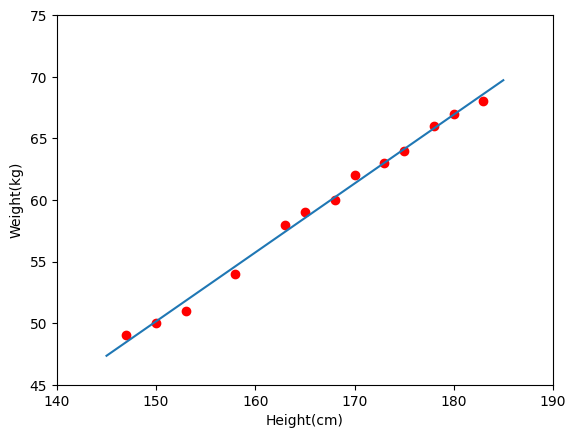

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T #Note: Vecto để dưới dạng cột
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

plt.plot(X,y,'ro')
plt.axis([140,190,45,75])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')

# ybar = mx+b
# Loss function: 1/2(y - ybar)^2
# Loss function min => Tìm giá trị của m, b để loss function min
x1 = np.sum(X**2)
x2 = np.sum(X)
x3 = X.shape[0]
y1 = np.sum(X*y)
y2 = np.sum(y)

D = x1*x3-x2*x2
Dx = y1*x3 - y2*x2
Dy = x1*y2 - x2*y1

m = Dx/D
b = Dy/D

print(m,b)

x_t = np.linspace(145,185,2)
y_t = m*x_t+b

plt.plot(x_t,y_t)



Dùng phương pháp nhân ma trận nghịch đảo

[[  0.55920496]
 [-33.73541021]]


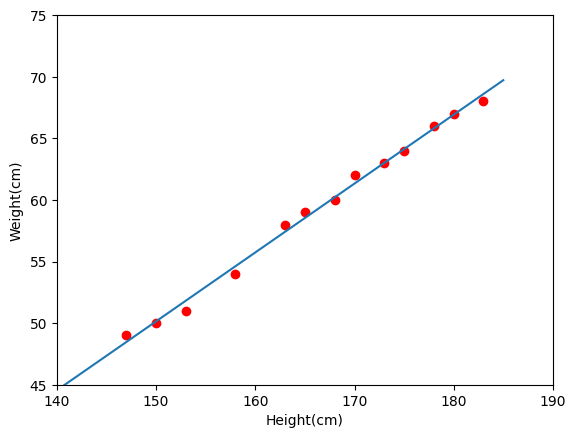

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

one = np.ones((X.shape[0],1))
Xbar = np.concatenate((X,one),1) #Thêm vào số 1 để biểu thị hệ số tự do

A = np.dot(Xbar.T,Xbar)
b = np.dot(Xbar.T,y)
w = np.dot(np.linalg.pinv(A),b)
print(w)

x_t = np.linspace(140,185,2)
y_t = w[0][0]*x_t + w[1][0]
plt.plot(X,y,'ro')
plt.axis([140,190,45,75])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(cm)')
plt.plot(x_t,y_t)
plt.show()

Note: Linear regression nhạy cảm với nhiễu.

[[ 0.15886665]
 [35.95164928]]


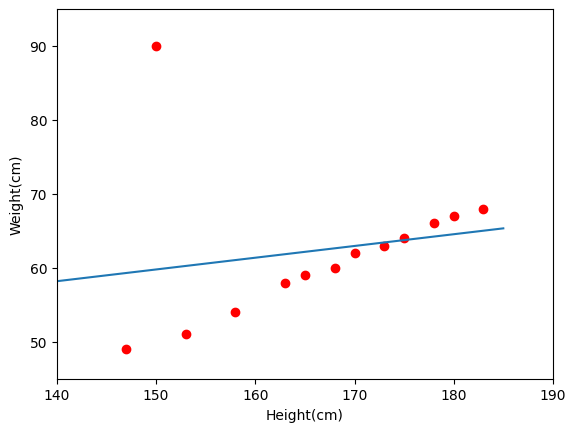

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[49, 90, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((X,one),1) #Thêm vào số 1 để biểu thị hệ số tự do

A = np.dot(Xbar.T,Xbar)
b = np.dot(Xbar.T,y)
w = np.dot(np.linalg.pinv(A),b)
print(w)

x_t = np.linspace(140,185,2)
y_t = w[0][0]*x_t + w[1][0]
plt.plot(X,y,'ro')
plt.axis([140,190,45,95])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(cm)')
plt.plot(x_t,y_t)
plt.show()

Hàm linear regression bị sai khi thêm vào giá trị nhiễu

2. Gradient descent

2.1 Ví dụ hàm x^2+5sin(x)



Solution x1 = -1.110503, cost = -3.246394, obtained after 32 iterations
Solution x2 = -1.110517, cost = -3.246394, obtained after 14 iterations


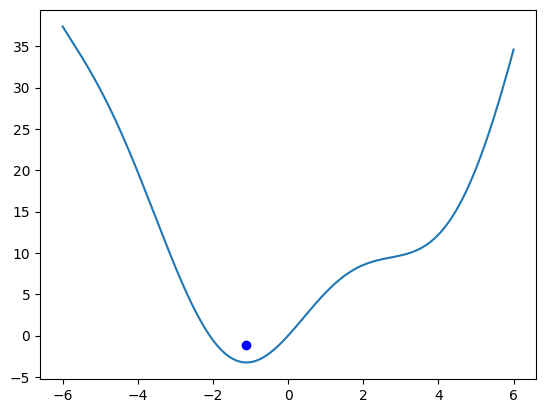

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def grad(x):
  return 2*x + 5*math.cos(x)

def value(x):
  return x**2 + 5*math.sin(x)

def grad_des(x0, lr):
  x = x0
  count= 0
  while(abs(grad(x)) > 0.0001):
    x = x - lr*grad(x)
    count += 1
  return (x,count)

(x1, c1) = grad_des(5, 0.1)
(x2, c2) = grad_des(-5, 0.1)

print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1,value(x1),c1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2, value(x2),c2))

x_t = np.linspace(-6,6,1000)
#print(x_t)
y_t = x_t*x_t + 5*np.sin(x_t)
plt.plot(x_t,y_t)
plt.plot(x1,x2,'bo')

2.2 Gradient Descent cho hàm nhiều biến

[[3.02104796]
 [3.99508042]]


(0.002365876393376709,
 0.9993152349576763,
 3.7519874299061367,
 7.424564984034455)

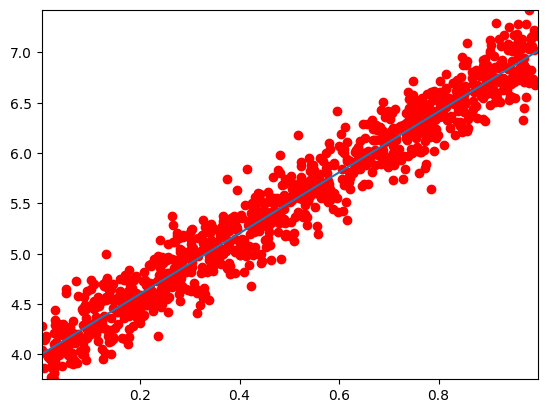

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


X = np.random.rand(1000,1)
y = 3*X+4 + 0.2*np.random.randn(1000,1) #tạo nhiễu, hàm randn tạo ra những số theo phân phối chuẩn

one = np.ones([1000,1])
Xbar = np.concatenate((X,one),axis = 1)

def grad(w):
  N = Xbar.shape[0]
  return 1/N * np.dot(Xbar.T,(np.dot(Xbar,w)-y))

def grad_des(w,lr):
  w0 = w
  for i in range (800):
    w0 = w0 - lr * grad(w0)
  return w0

w0 = np.array([[2,1]]).T
w_ans = grad_des(w0, 0.1)
print(w_ans)

x_t = np.linspace(np.min(X),np.max(X),2)
y_t = w_ans[0]*x_t + w_ans[1]
plt.plot(X,y,'ro')
plt.plot(x_t,y_t)
plt.axis([np.min(X),np.max(X),np.min(y),np.max(y)])



Ví dụ hàm 2 biến f(x,y) = (x^2+y-7)^2 + (x-y+1)^2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def grad(x,y):
  grad_x = 4*x*(x*x+y-7) + 2*(x-y+1)
  grad_y = 2*(x*x+y-7) - 2*(x-y+1)
  ans = np.array([[grad_x, grad_y]]).T
  return ans

def grad_des(w, lr):
  w0 = w
  for i in range(500):
    w0 = w0 - lr * grad(w0[0][0],w0[1][0])
  return w0

w = np.array([[4,5]]).T
# print(w)
# print(grad(w[0][0],w0[1][0]))
print(grad_des(w , 0.01))

[[1.99999982]
 [3.00000092]]


3. Perceptron Learning Algorithm

[[ 3.91934361]
 [-1.73725425]
 [-1.        ]]


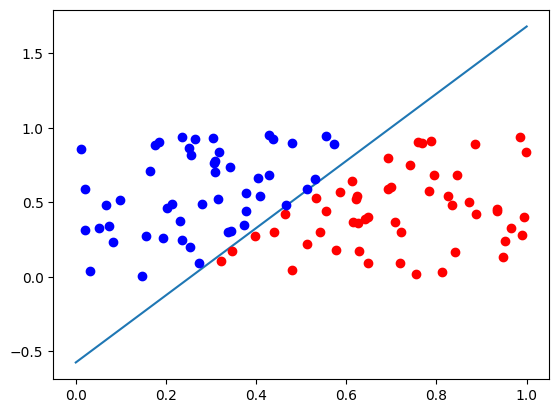

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_function(x):
  return 2*x[0] - x[1] - 0.5

np.random.seed()
X = np.random.rand(100,2)
#print(X)

y = np.array([1 if linear_function(x) > 0 else -1 for x in X])
#print(y)

one = np.ones([100,1])
Xbar = np.concatenate((X,one),axis = 1).T

def check(w, X, y):
  res = np.sign(np.dot(w.T,X))
  return np.array_equal(res[0],y)
#print(X[1].reshape(2,1))

def perceptron(w_init, X, y):
  w = w_init
  for j in range(10000):
    id = np.random.permutation(100)
    for i in range (100):
      if np.sign(np.dot(w.T, X[:,id[i]]))[0] != y[id[i]]:
        w = w + (y[id[i]] * X[:,id[i]]).reshape(3,1)

    if check(w, X, y):
      break;
  return w

class_1 = []
class_2 = []
for x in X:
  if linear_function(x) > 0:
    class_1.append(x)
  else:
    class_2.append(x)
class_1 = np.array(class_1).T
class_2 = np.array(class_2).T


w = np.array([[1,2,3]]).T
w_ans = perceptron(w, Xbar, y)
print(w_ans)
x_test = np.linspace(0,1,2)
y_test = -w_ans[0][0]/w_ans[1][0] * x_test - w_ans[2][0]/w_ans[1][0]
plt.plot(x_test, y_test)
plt.plot(class_1[0], class_1[1], 'ro')
plt.plot(class_2[0], class_2[1], 'bo')



